# Assignment on Random Forest

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.shape

(3276, 10)

<Axes: xlabel='ph', ylabel='Density'>

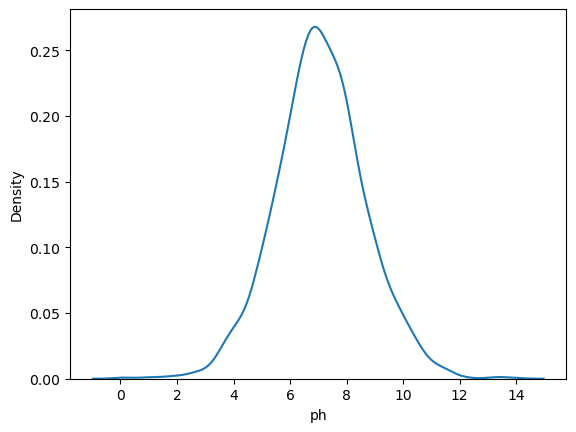

In [8]:
sns.kdeplot(data=df,x='ph')

<Axes: xlabel='Sulfate', ylabel='Density'>

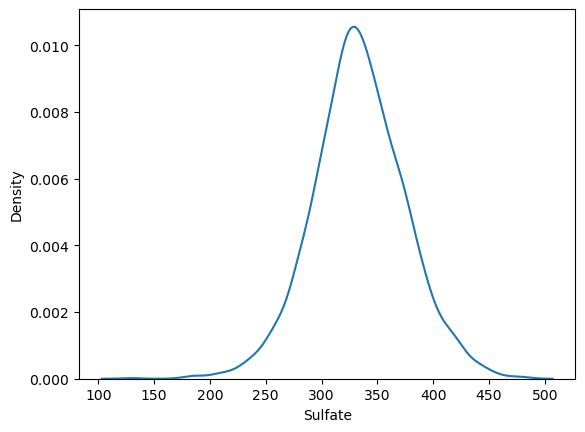

In [9]:
sns.kdeplot(data=df,x='Sulfate')

<Axes: xlabel='Trihalomethanes', ylabel='Density'>

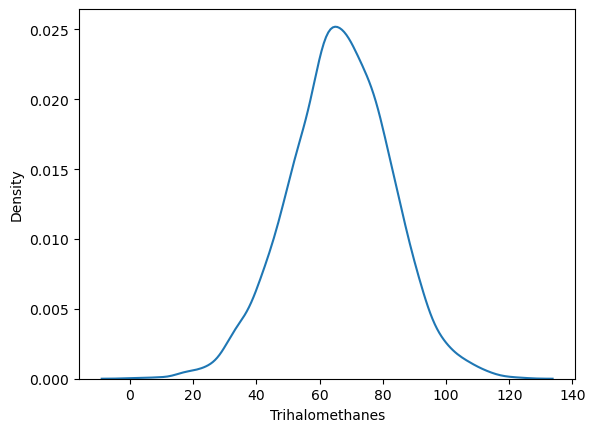

In [10]:
sns.kdeplot(data=df,x='Trihalomethanes')

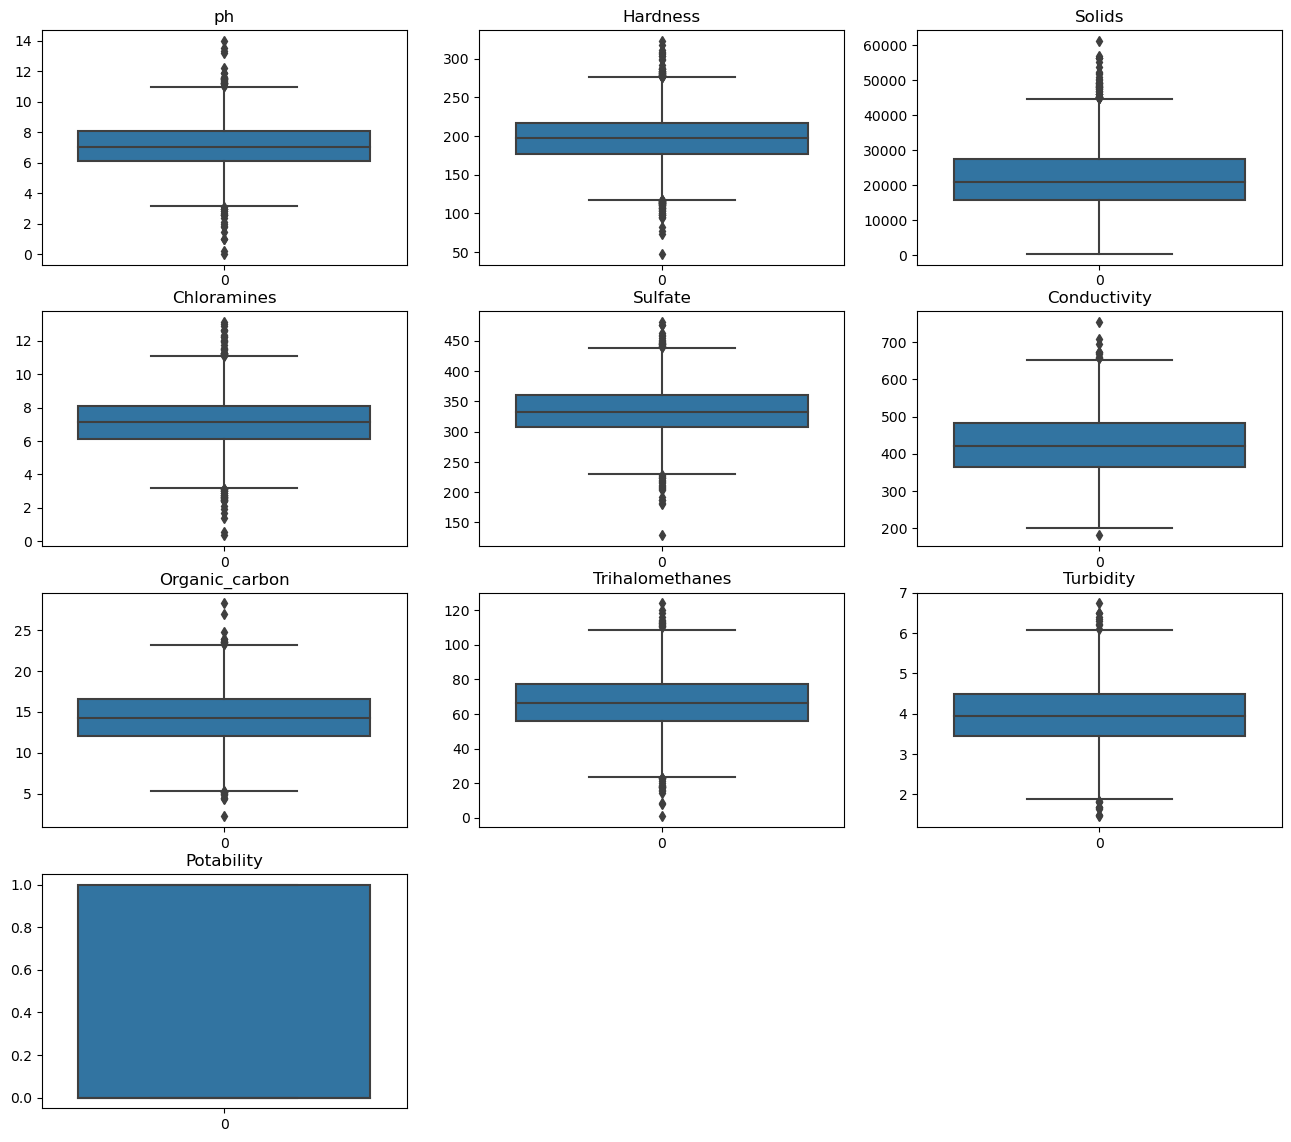

In [11]:
plt.figure(figsize=(16,14))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df[col])
    plt.title(col)

every column has outlier

### replacing missing values with prediction

In [12]:
data=df.dropna()
nonnull=[ 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Turbidity', 'Potability']
nullcol=['ph', 'Sulfate', 'Trihalomethanes']
for i in nullcol:
    x_train=data.drop(nullcol,axis=1)
    y_train=data[i]
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    
    x=df[df[i].isnull()]
    x_test=x.drop(nullcol,axis=1)
    y_pred=lr.predict(x_test)
    
    count =0
    for j in x_test.index:
        df.at[j,i]=y_pred[count]
        count= count+1

In [13]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

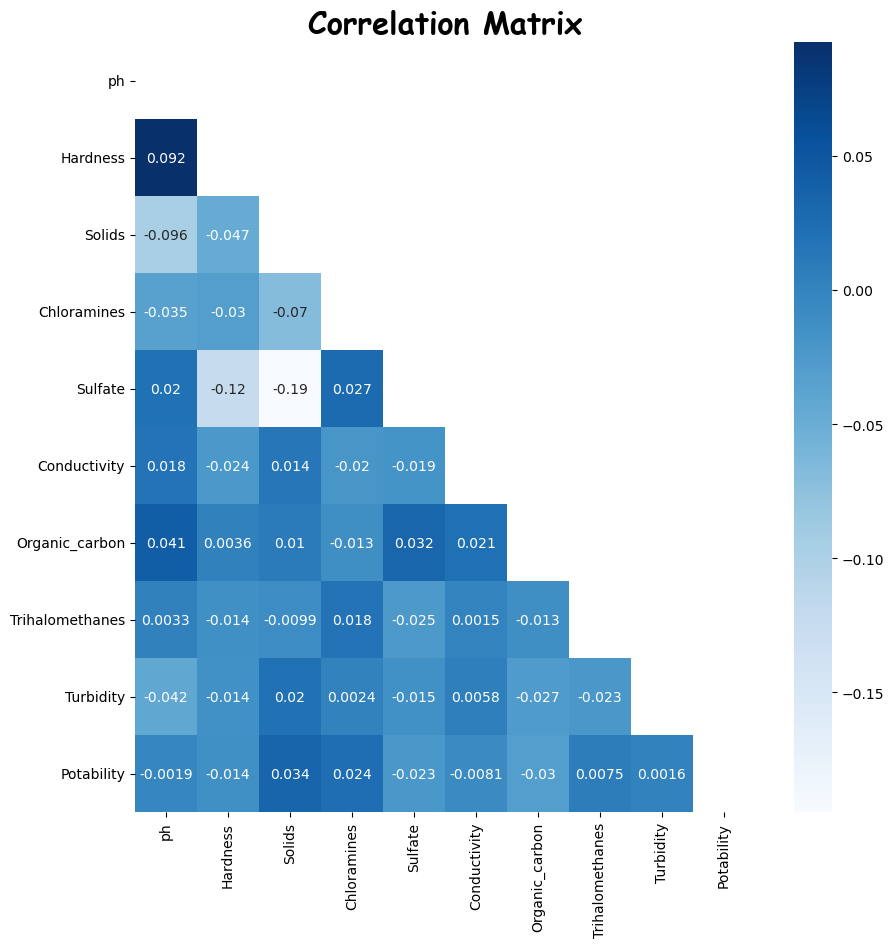

In [14]:
c=df.corr()
tcf=c.index
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='cursive', color="#000000")
mask = np.triu(np.ones_like(c))
g=sns.heatmap(df[tcf].corr(),mask=mask, annot=True,cmap="Blues")

## Machine Learning

In [15]:
x=df.drop('Potability', axis=1)
y=df['Potability']
# std= StandardScaler()
# x=pd.DataFrame(std.fit_transform(x))

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=86)

In [17]:
rfc=RandomForestClassifier()

In [18]:
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
rfc_acc=accuracy_score(predictions, y_test)
rfc_prec=precision_score(predictions, y_test)
rfc_rec=recall_score(predictions, y_test)
rfc_f1=f1_score(predictions, y_test)

Accuracy Score:  0.6920731707317073


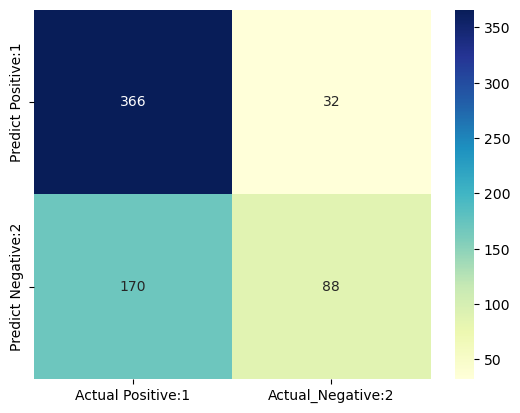

In [19]:
print('Accuracy Score: ', accuracy_score(predictions, y_test))
cm=confusion_matrix(y_test,predictions)
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual_Negative:2'],index=['Predict Positive:1','Predict Negative:2'])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')
plt.show()

In [20]:
d={'Matrix':['Accuracy_Score','Precision_Score','Recall_Score','F1_Score'],
   'Scores':[rfc_acc*100,rfc_prec*100,rfc_rec*100,rfc_f1*100]}
results=pd.DataFrame(d)

In [21]:
results

,Matrix,Scores
0,Accuracy_Score,69.207317
1,Precision_Score,34.108527
2,Recall_Score,73.333333
3,F1_Score,46.560847


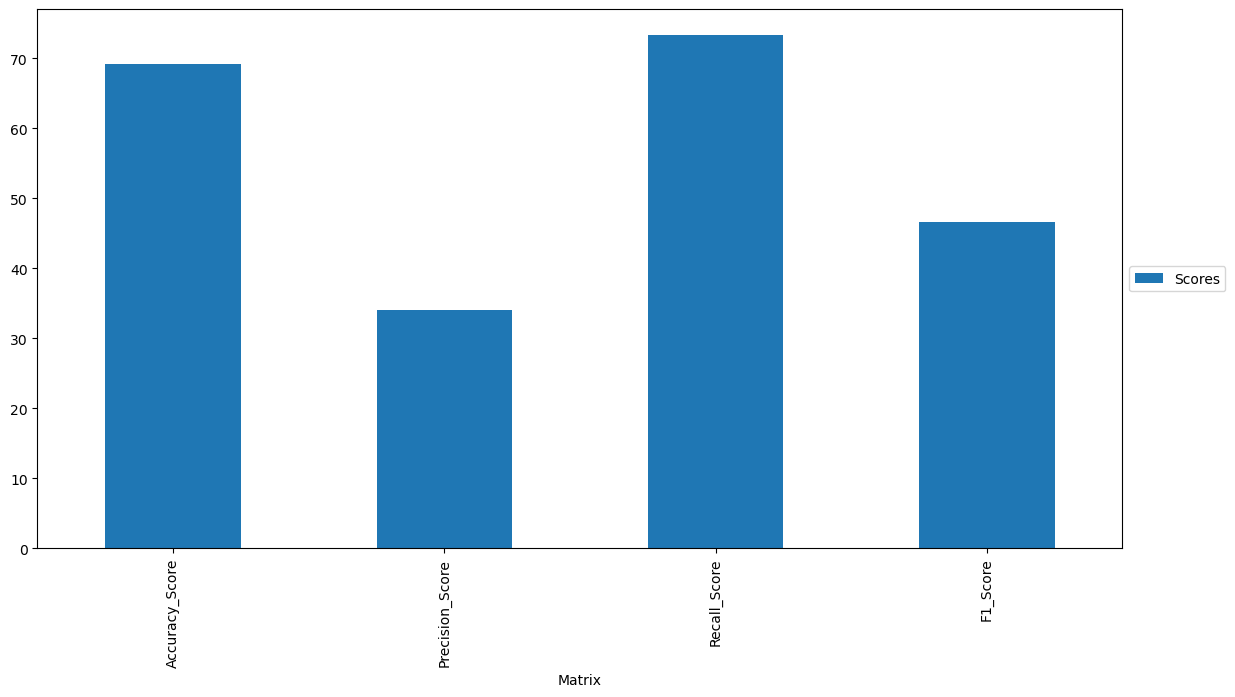

In [22]:
results.plot.bar(x='Matrix',figsize=(14,7))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

In [24]:
filename="random_forest.sav"
pickle.dump(rfc,open(filename,'wb'))